## Importing Modules

In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


## Input Data

In [ ]:
# Input the data set
df = pd.read_csv("/content/50_Startups.csv")

##In case you want to view data plots un-comment the following lines
#fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
#fig.figsize = (10, 10)
#ax[0, 0].scatter(df['Profit'], df['R&D Spend'],color = 'red')
#ax[0, 1].scatter(df['Profit'], df['Administration'],color = 'yellow')
#ax[1, 0].scatter(df['Profit'], df['Marketing Spend'], color ='green')
#ax[1, 1].scatter(df['Profit'], df['State'],color = 'blue')
#plt.tight_layout()

## Define features and labels

In [ ]:
# Define features and labels
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

## Converting text into columns

In [ ]:
# Convert text data to numbers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))


## Scaling Dataset

In [ ]:
# Scale the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)


## Separating training and testing data

In [ ]:
# Separate the dataset into training and testing## Define features and labels
Xtrain, Xtest, Ytrain, Ytest = train_test_split( x, y, test_size = 0.3,random_state=42)


## Implementing the logic for cost function and gradient descent function

In [ ]:
# Creating the cost and gradient function
#calculate cost
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

In [ ]:
#Gradient Descent
def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost at epoch",epoch,"is:",cost)
        
    return w, b, cost_list

## Calculating weights and bias

In [ ]:
# Calculating weights and bias
w, b, c= GradientDescent(Xtrain, Ytrain, np.zeros(Xtrain.shape[1]), 0, 0.002,epochs=15000)
#38791988.606615104 is lowest cost achieved

Cost at epoch 0 is: 6989316078.6237135
Cost at epoch 1500 is: 93910079.250253
Cost at epoch 3000 is: 52213406.46017958
Cost at epoch 4500 is: 44053387.93102421
Cost at epoch 6000 is: 41718884.2933599
Cost at epoch 7500 is: 41048136.36983319
Cost at epoch 9000 is: 40855409.29807189
Cost at epoch 10500 is: 40800032.694304764
Cost at epoch 12000 is: 40784121.23860737
Cost at epoch 13500 is: 40779549.37241818


## Plotting the cost function

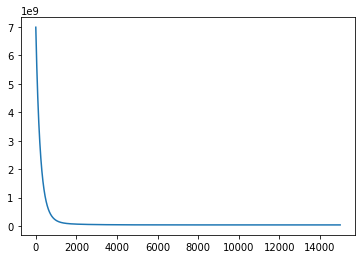

In [ ]:
# Plotting the cost
plt.plot(c)

## Predicting values

In [ ]:
# Predicting labels with the calculated weights and biases
def predict(X, w, b):
    return X.dot(w) + b

In [ ]:
y_pred = predict(Xtest, w, b)

## Calculating accuracy

In [ ]:
# Calculating the r² accuracy of our model
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

In [ ]:
r2score(y_pred, Ytest)

0.9397254670323117